# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from datetime import datetime
import math
import seaborn as sns

added libraries i commonly use 

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [ ]:
games = pd.read_csv('/datasets/games.csv')

In [ ]:
games.info()
games.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
games.duplicated().sum()

0

i first imported the data set. i then checked the basic info of the dataframe using .info and .head. this helped me see that i need to convert all collumn names to lower. i also need to change the type on year_of_release, critic_score, and user_score. i then ran .duplicated().sum() to check if i have any duplicates.

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [ ]:
games.columns = games.columns.str.lower()

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


i changed the column names with lower then checked with .info(). based off of the non-null count we can tell were missing many values. we can also see that some types need be changed. 

### 2.2 Data Type Conversion

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
First i changef user_score to a float then chedcked to see it worked, i then made a dataframe with the year_of_release being 2016 for future use. i checked every column with unique and didnt get anything with TBD.

### 2.3 Handling Missing Values

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
games.isnull().sum() / len(games) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

# Analyze patterns in missing 
after checking the data frame with info and thengetting the percentage of missing values we can see most of the values that are missing are from critic scores, user scores, and ratings. 

# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.
Earlier i found that many of the ones with nan are olders games that could have came out before rating and scores started being given.it is also possible tht some of the new games that came out at the time the data was retrieved, dont have some of the scores and ratings. for the time being i plan on leaving the values missing as i dont want to ruin the datas integrity. if need be i will drop rows with missing values.

### 2.4 Calculate Total Sales

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

i got the total sales of each game and made it into a new column

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [ ]:
releases_by_year = games.groupby('year_of_release').size().reset_index(name='number_of_games')
releases_by_year.head()


,year_of_release,number_of_games
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


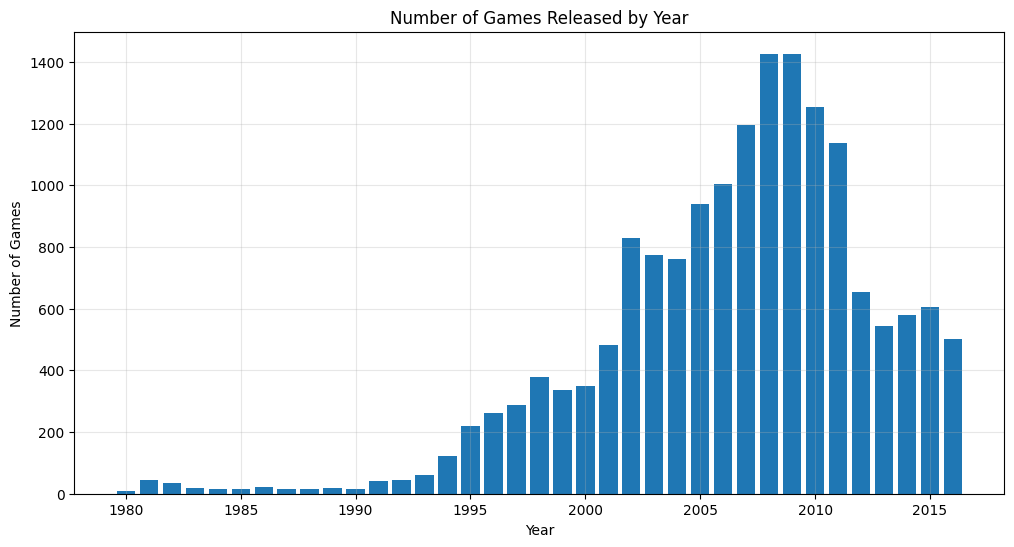

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(releases_by_year['year_of_release'], releases_by_year['number_of_games'])
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released by Year')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
releases_by_year.describe()


,year_of_release,number_of_games
count,37.000000,37.000000
mean,1998.000000,444.486486
std,10.824355,451.557159
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

i grouped by year then displayed the data. the data shows a surge of relases following the 2000's, which is likely due to many video game companies or video game consels being made. this can also explain the drop off after 2010, as the companies that dont succeed probably go out of business.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [ ]:
sales_by_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
print(sales_by_platform.head())



   year_of_release platform  total_sales
0           1980.0     2600        11.38
1           1981.0     2600        35.68
2           1982.0     2600        28.88
3           1983.0     2600         5.84
4           1983.0      NES        10.96


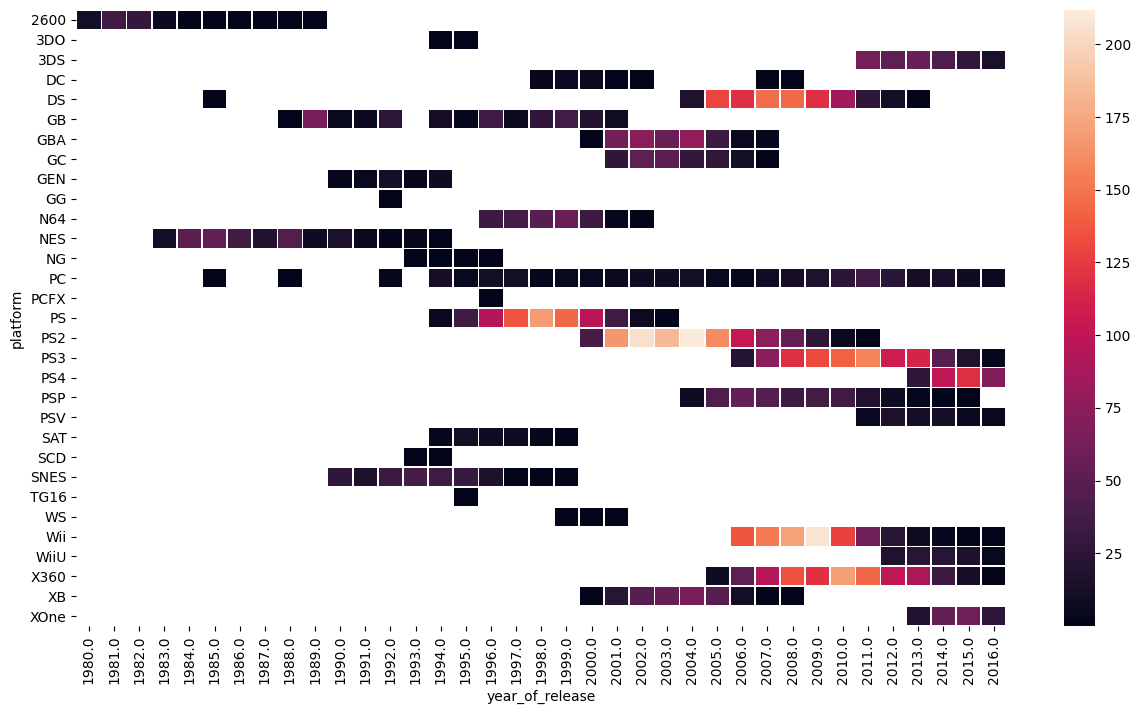

In [ ]:
pivot_sales_by_platform = sales_by_platform.pivot(index = 'platform', columns = 'year_of_release', values = 'total_sales')
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_sales_by_platform, linewidths = 0.5, linecolor = 'white') 
plt.show()


# Identify platforms with declining sales
from the heat map it seems all platforms are declining in sales, this could just be due to people buying a new consol when it comes out and playing the games they have rather than buying the new games that are being realeased

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

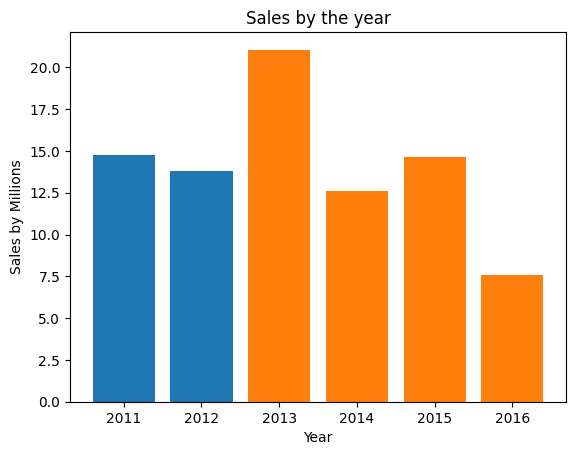

In [ ]:
relevant_years_6 = [2011, 2012, 2013, 2014, 2015, 2016]
relevant_years_4 = [2013, 2014, 2015, 2016]
df_relevant_6 = games[games['year_of_release'].isin(relevant_years_6)]
df_relevant_4 = games[games['year_of_release'].isin(relevant_years_4)]
plt.bar(df_relevant_6['year_of_release'], df_relevant_6['total_sales'])
plt.bar(df_relevant_4['year_of_release'], df_relevant_4['total_sales'])
plt.title('Sales by the year') 
plt.ylabel('Sales by Millions')
plt.xlabel('Year')
plt.show()


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

based on the data i selected the years 2013-2016. many  factors influenced my decision, in the bar graphs above we can see that even though 2011-2012 had similar sales as 2014-2015, we can see in the first bar graph that the number of games that came out in 2011-2012 is greater. in 2011-2012 there was about 1,800 games that came out while in 2014-2015 there was about 1,200 games that came out. meaning that even though annual sales is similar the actual games that produced those sales were more spread out. i also used the heat map to check how many consoles would be accounted for. if i did 2011 it would have some years that the newer consols werent a part of, and by doing the years 2013-2016 9 out of the 11 platforms included are still producing. when looking towards the immidiate future, i need to use data that are up to the current trends.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

<Figure size 1500x600 with 0 Axes>

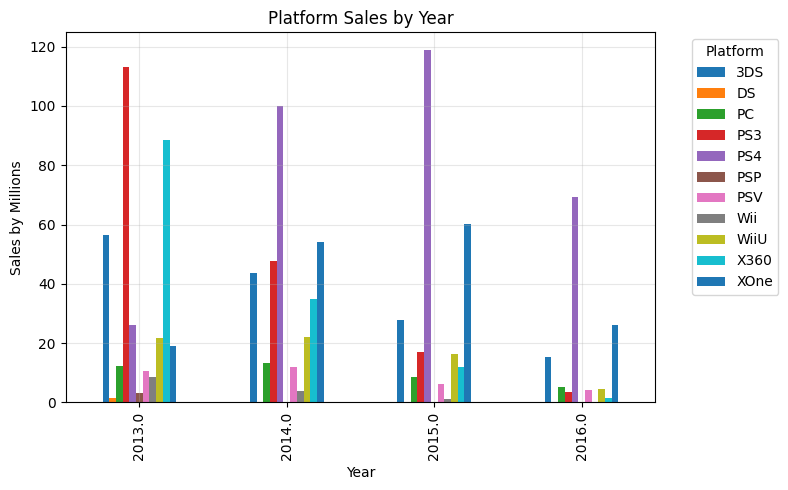

In [ ]:
relevant_years = games[games['year_of_release'] >= 2013]
df_relevant_years = relevant_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index(name = 'sales')
pivot_relevant_years = df_relevant_years.pivot(index = 'year_of_release', columns = 'platform', values = 'sales')
plt.figure(figsize = (15, 6))
pivot_relevant_years.plot(kind = 'bar', figsize = (8, 5))
plt.xlabel('Year')
plt.ylabel('Sales by Millions')
plt.title('Platform Sales by Year')
plt.legend(title = 'Platform', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

In [ ]:
platform_sales = df_relevant_years.groupby('platform')['sales'].sum().reset_index(name = 'total_sales').sort_values(by = 'total_sales')
platform_sales.head(11)


,platform,total_sales
1,DS,1.54
5,PSP,3.50
7,Wii,13.66
6,PSV,32.99
2,PC,39.43
8,WiiU,64.63
9,X360,136.80
0,3DS,143.25
10,XOne,159.32
3,PS3,181.43


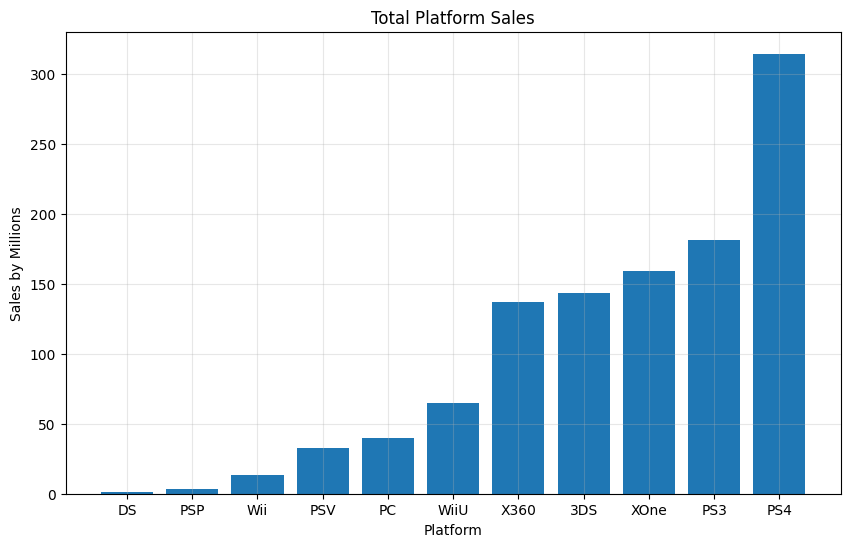

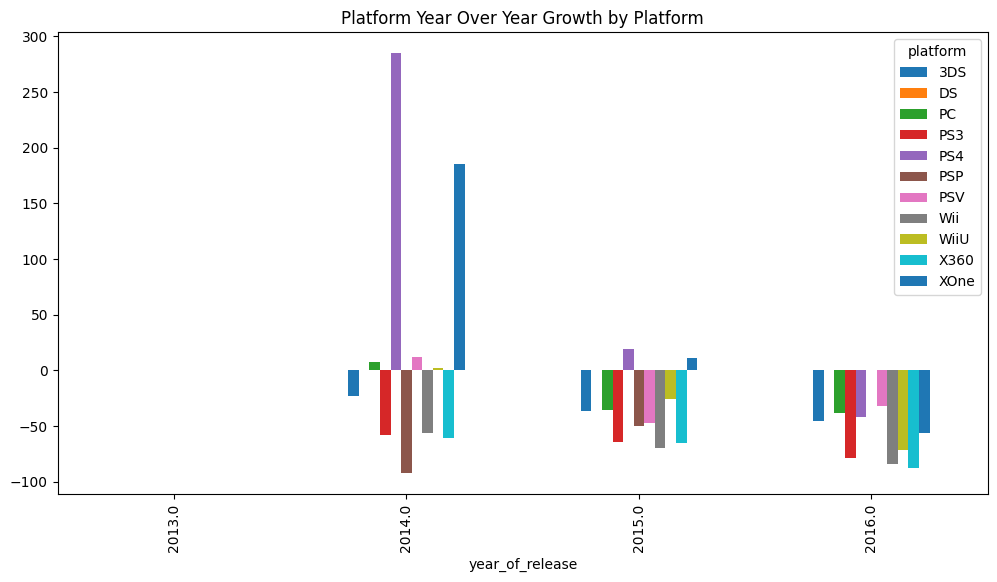

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(platform_sales['platform'], platform_sales['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Sales by Millions')
plt.title('Total Platform Sales')
plt.grid(True, alpha = 0.3)
plt.show()

relevant_years_sorted = df_relevant_years.sort_values(['platform', 'year_of_release'])
yoy_growth = relevant_years_sorted.groupby('platform')['sales'].pct_change()
relevant_years_growth = relevant_years_sorted.copy()
relevant_years_growth['yoy_growth'] = yoy_growth
relevant_years_growth['yoy_growth'] = relevant_years_growth['yoy_growth'] * 100
relevant_years_growth.dropna().head(10)
relevant_years_growth_pivot = relevant_years_growth.pivot(index = 'year_of_release', columns = 'platform', values = 'yoy_growth')
relevant_years_growth_pivot.plot(kind = 'bar', figsize = (12, 6))
plt.title('Platform Year Over Year Growth by Platform')
plt.show()



based on the data we can see that the playstation platform (playstation 3 and playstation 4) preforms the best out of the platforms as 3/4 of the years it was the top preformer with xbox (xbox 360 and xbox one) being second in those years.we can also see that after 2014 every platform saw a decline with the exception being the xbox one and the playstation 4.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

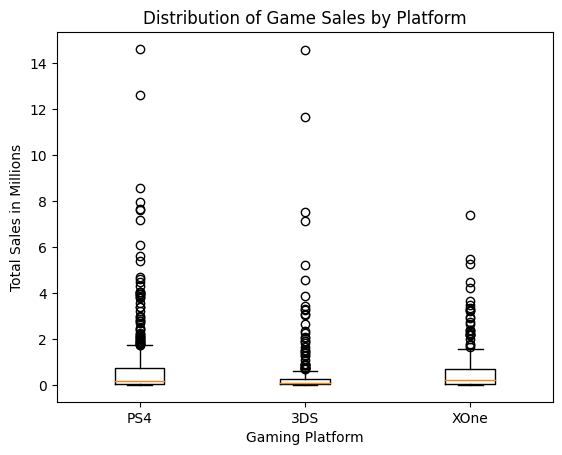

In [ ]:
selected_platforms = ['PS4', '3DS', 'XOne']
filtered_df = relevant_years[relevant_years['platform'].isin(selected_platforms)]
ps4_sales = filtered_df[filtered_df['platform'] == 'PS4']['total_sales']
ds_sales = filtered_df[filtered_df['platform'] == '3DS']['total_sales'] 
xone_sales = filtered_df[filtered_df['platform'] == 'XOne']['total_sales']
sales_data = [ps4_sales, ds_sales, xone_sales]
plt.boxplot(sales_data, labels=['PS4', '3DS', 'XOne'])
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales in Millions')
plt.title('Distribution of Game Sales by Platform')
plt.show()






In [ ]:
print("PS4 Sales Statistics:")
print(ps4_sales.describe())
print("\n3DS Sales Statistics:")
print(ds_sales.describe())
print("\nXOne Sales Statistics:")
print(xone_sales.describe())

PS4 Sales Statistics:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

3DS Sales Statistics:
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

XOne Sales Statistics:
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [ ]:
ps4_mask = ['PS4']

ps4_scores = games[games['platform'].isin(ps4_mask)][['user_score', 'critic_score', 'rating', 'year_of_release', 'total_sales']]
ps4_scores.head(10)


,user_score,critic_score,rating,year_of_release,total_sales
31,NaN,NaN,NaN,2015.0,14.63
42,8.3,97.0,M,2014.0,12.62
77,4.3,82.0,E,2015.0,8.58
87,NaN,NaN,NaN,2015.0,7.98
92,5.7,83.0,M,2014.0,7.66
94,5.0,85.0,E,2016.0,7.60
105,6.5,87.0,M,2015.0,7.17
143,5.7,82.0,E,2014.0,6.08
154,6.1,76.0,T,2014.0,5.64
171,7.9,93.0,T,2016.0,5.39


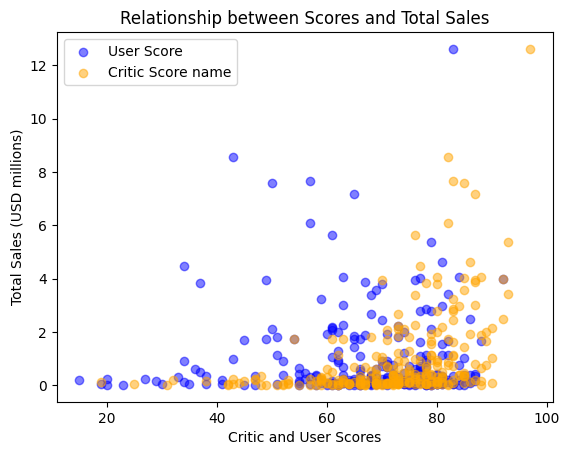

In [ ]:
ps4_scores['user_score'] = ps4_scores['user_score'] *10 #used this to scale both scores the same 
ps4_scores.head()
plt.scatter(ps4_scores['user_score'], ps4_scores['total_sales'], c = 'blue', alpha = 0.5, label = 'User Score')
plt.scatter(ps4_scores['critic_score'], ps4_scores['total_sales'], c = 'orange', alpha = 0.5, label = 'Critic Score name')
plt.ylabel('Total Sales (USD millions)')
plt.xlabel('Critic and User Scores')
plt.legend()
plt.title('Relationship between Scores and Total Sales')
plt.show()







In [ ]:
correlation_critic = ps4_scores['critic_score'].corr(ps4_scores['total_sales'])
print("Critic Correlation:")
print(correlation_critic)
correlation_user = ps4_scores['user_score'].corr(ps4_scores['total_sales'])
print("User Correlation:")
print(correlation_user)




Critic Correlation:
0.40656790206178095
User Correlation:
-0.03195711020455641


i first filtered for ps4 games and then adjusted the scores so they would be on teh same scale. i then created a scatter plot showing both the scores compared to the total sales. i then calculated the correlation of them. the critic correlation (0.40656790206178095) shows a moderate positive correlation between the scores and total sales. the user correlation (-0.031957110204556376) shows that very it doesnt correlate with total sales.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [ ]:
game_names = games.groupby(['name'])['total_sales'].size()
multiple_platforms = game_names[game_names > 5]
multiple_platforms_df = games[games['name'].isin(multiple_platforms.index) & (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]
clean_multiple_platform_df = multiple_platforms_df.sort_values(['name', 'total_sales'], ascending=[True, False])




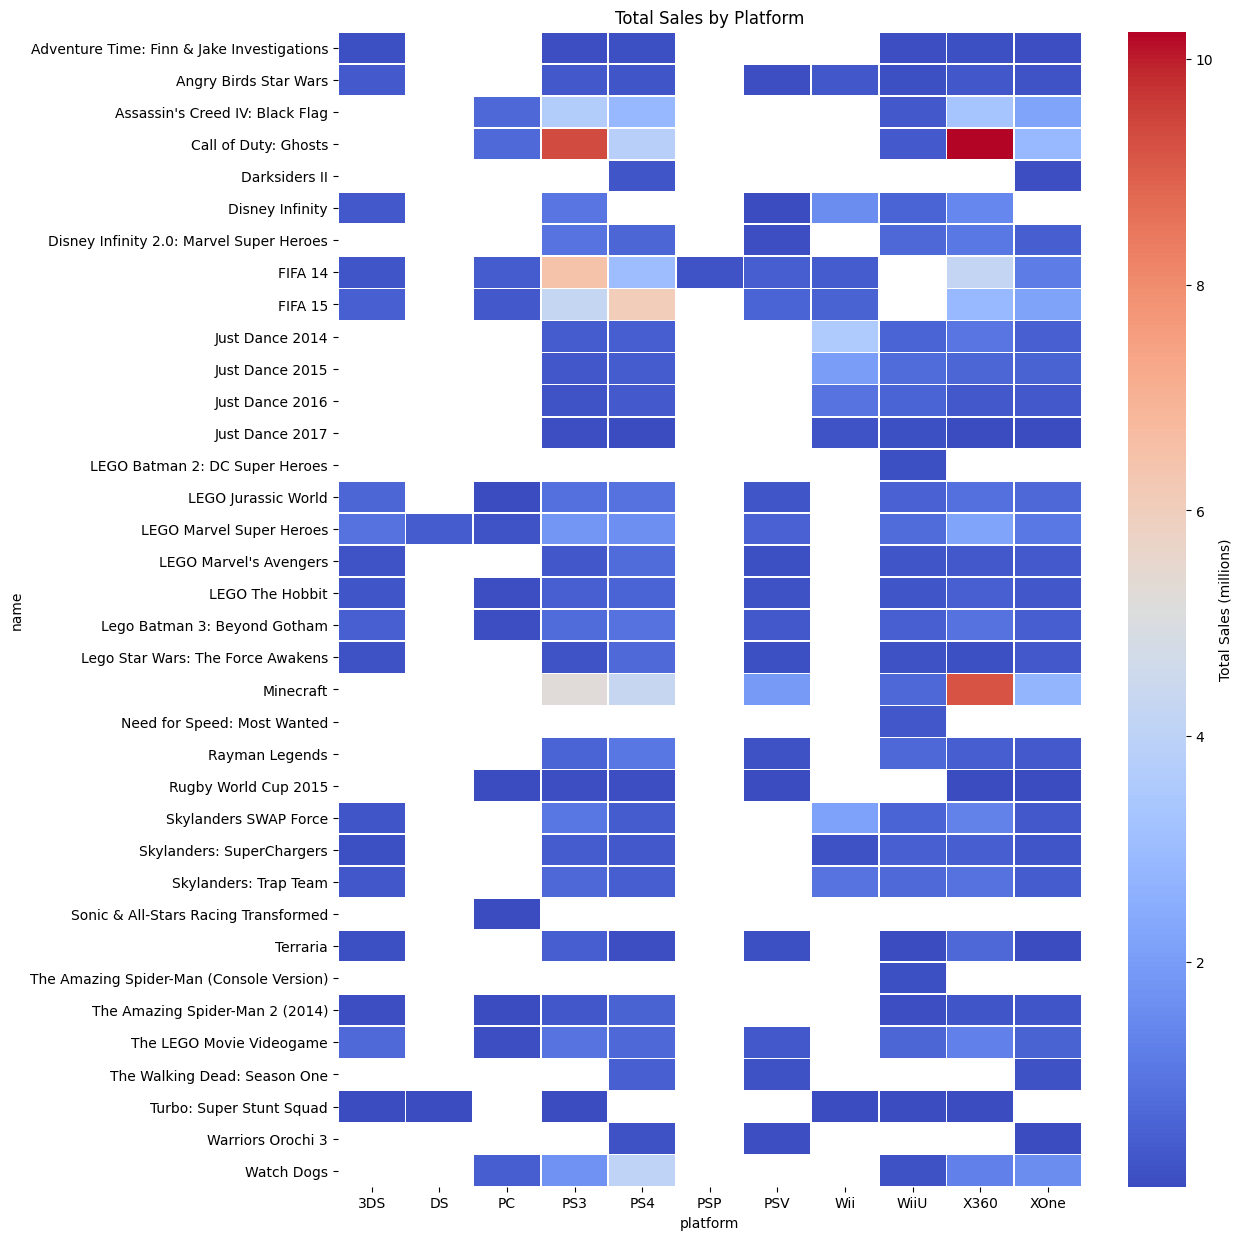

In [ ]:
pivot_multiple_platform = clean_multiple_platform_df.pivot(index = 'name', columns = 'platform', values = 'total_sales')
plt.figure(figsize = (12, 15))
sns.heatmap(pivot_multiple_platform, linewidths = 0.5, linecolor = 'white', cmap = 'coolwarm', cbar_kws = {'label': 'Total Sales (millions)'})
plt.title('Total Sales by Platform')
plt.show()



i filtered my data to include games with multiple platform releases then and then created a heatmap to show. based on the heat map we can see that across platforms releasing the same game, it remains relitivly the same in total sales. the only platforms that occasional break the trend is the playstation (both playstation 3 and playstation 4) and the xbox (both the xbox360 and xbox one).

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

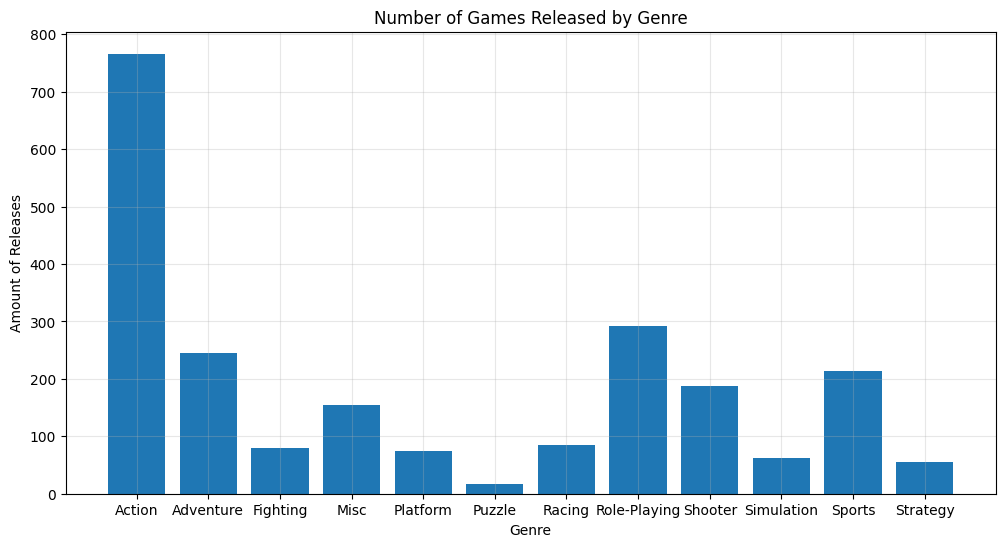

           genre  frequency  market_genre
0         Action        766     34.303627
1      Adventure        245     10.971787
2       Fighting         80      3.582624
3           Misc        155      6.941335
4       Platform         74      3.313927
5         Puzzle         17      0.761308
6         Racing         85      3.806538
7   Role-Playing        292     13.076579
8        Shooter        187      8.374384
9     Simulation         62      2.776534
10        Sports        214      9.583520
11      Strategy         56      2.507837


In [ ]:
genre_count = df_relevant_4.groupby(['genre'])['genre'].count().reset_index(name = 'frequency')
plt.figure(figsize=(12, 6))
plt.bar(genre_count['genre'], genre_count['frequency'])
plt.xlabel('Genre')
plt.ylabel('Amount of Releases')
plt.title('Number of Games Released by Genre')
plt.grid(True, alpha=0.3)
plt.show()
genre_count.head(10)

def calculate_market_shares_genre(sales_data):
    total_genre_frequency = sales_data['frequency'].sum()
    market_genre = (sales_data['frequency'] / total_genre_frequency) * 100
    return market_genre
genre_count['market_genre'] = calculate_market_shares_genre(genre_count)
print(genre_count.head(12))



In [ ]:
game_genre_total_sales = df_relevant_4.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(['total_sales'])
print(game_genre_total_sales.head(10))

           genre  total_sales
5         Puzzle         3.17
11      Strategy        10.08
9     Simulation        21.76
1      Adventure        23.64
2       Fighting        35.31
6         Racing        39.89
4       Platform        42.63
3           Misc        62.82
7   Role-Playing       145.89
10        Sports       150.65


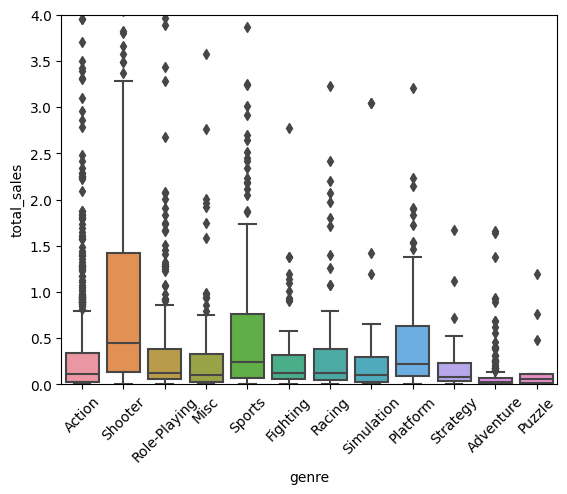

In [ ]:
sns.boxplot(data = df_relevant_4, x = 'genre', y = 'total_sales')
plt.xticks(rotation = 45)
plt.ylim(0, 4)
plt.show()


           genre  total_sales  market_share
5         Puzzle         3.17      0.290642
11      Strategy        10.08      0.924186
9     Simulation        21.76      1.995067
1      Adventure        23.64      2.167435
2       Fighting        35.31      3.237400
6         Racing        39.89      3.657318
4       Platform        42.63      3.908535
3           Misc        62.82      5.759657
7   Role-Playing       145.89     13.375936
10        Sports       150.65     13.812357
8        Shooter       232.98     21.360790
0         Action       321.87     29.510677


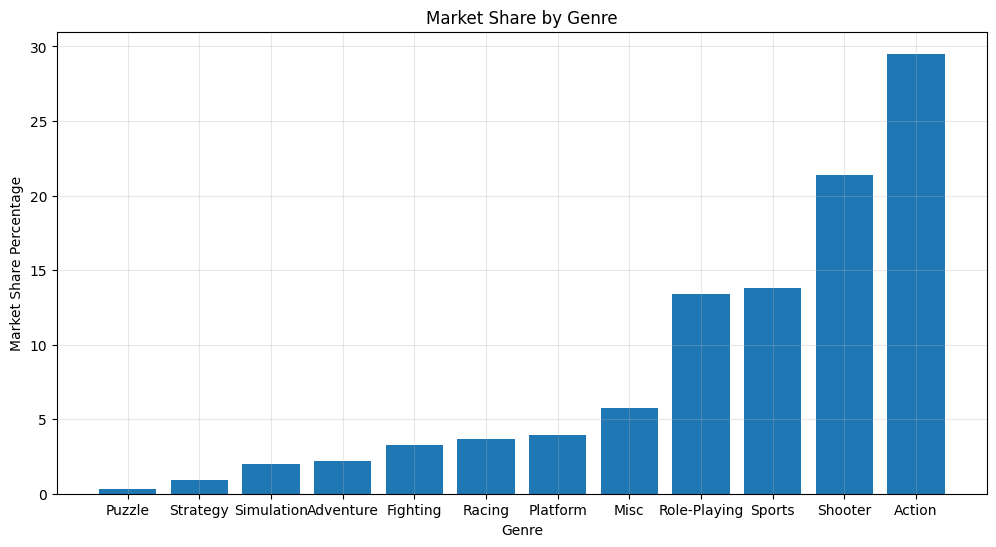

In [ ]:
def calculate_all_market_shares(sales_data):
    total_market_sales = sales_data['total_sales'].sum()
    market_shares = (sales_data['total_sales'] / total_market_sales) * 100
    return market_shares 
 
game_genre_total_sales['market_share'] = calculate_all_market_shares(game_genre_total_sales)

print(game_genre_total_sales.head(12))

plt.figure(figsize=(12, 6))
plt.bar(game_genre_total_sales['genre'], game_genre_total_sales['market_share'])
plt.xlabel('Genre')
plt.ylabel('Market Share Percentage')
plt.title('Market Share by Genre')
plt.grid(True, alpha=0.3)
plt.show()


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

based on the data we can see that the genres action, shooter, sports, and role playing are the majority of the market shares. But when you take into consideration of the amount of releases each genre has some are doing better than others. by checking the amount of game releases per genre compared to the total game releases i compared the percentage of games released to the market share percentage. about 34% of all releases were action yet they hold about 30% of market shares. Role playing had about 13% of all releases being that genre as well as about 13% of the market shares. sports had about 9% of releases and hold about 14% of market shares. shooter on the other hand have about 8% of releases yet hold about 21% of market shares.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [ ]:
def calculate_region_platform_performance(data, regions=['na_sales', 'eu_sales', 'jp_sales']):
    platform_totals = data.groupby('platform')[regions].sum().reset_index()
    return platform_totals

In [ ]:
platform_performance = calculate_region_platform_performance(df_relevant_4)
print(platform_performance.head())


  platform  na_sales  eu_sales  jp_sales
0      3DS     38.20     30.96     67.81
1       DS      0.57      0.85      0.00
2       PC     11.11     25.36      0.00
3      PS3     63.50     67.81     23.35
4      PS4    108.74    141.09     15.96


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

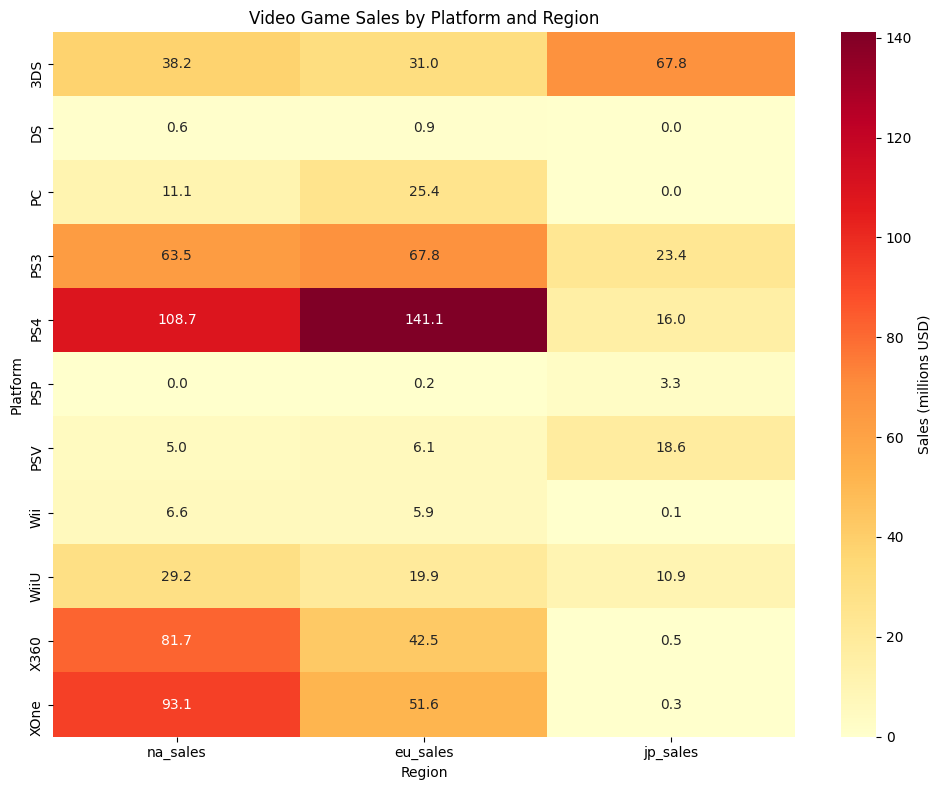

In [ ]:
platform_performance = platform_performance.set_index('platform')
plt.figure(figsize=(10, 8))
sns.heatmap(platform_performance, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': 'Sales (millions USD)'})
plt.title('Video Game Sales by Platform and Region')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()



i got the totals for the platform and regions on a heat map. the data suggest that most sales are comping from europe and north america, while japan sells less in almost every platform except 3ds,psv, and psp which suggest that japan prefers hand held platforms.

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [ ]:
def calculate_region_genre_performance(data, regions=['na_sales', 'eu_sales', 'jp_sales']):
    genre_totals = data.groupby('genre')[regions].sum().reset_index()
    return genre_totals




### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

       genre  na_sales  eu_sales  jp_sales
0     Action    126.05    118.13     40.49
1  Adventure      7.14      8.25      5.82
2   Fighting     15.55      8.55      7.65
3       Misc     27.49     20.04      9.20
4   Platform     18.14     15.58      4.79


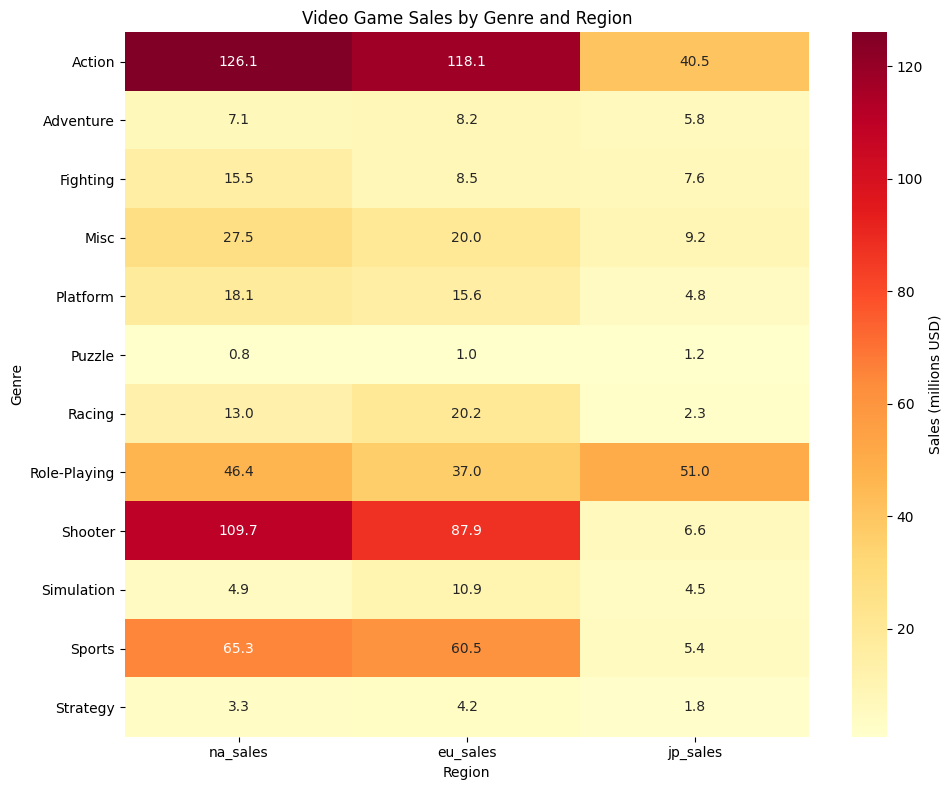

In [ ]:
genre_performance = calculate_region_genre_performance(df_relevant_4)
print(genre_performance.head())
genre_performance = genre_performance.set_index('genre')
plt.figure(figsize=(10, 8))
sns.heatmap(genre_performance, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': 'Sales (millions USD)'})
plt.title('Video Game Sales by Genre and Region')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [ ]:
def calculate_region_rating_preformance(data, regions=['na_sales', 'eu_sales', 'jp_sales']):
    rating_average = data.groupby('rating')[regions].mean().reset_index()
    return rating_average




  rating  na_sales  eu_sales  jp_sales
0      E  0.261755  0.276026  0.050132
1   E10+  0.215238  0.169405  0.023373
2      M  0.447724  0.393821  0.038238
3      T  0.149520  0.125976  0.061832


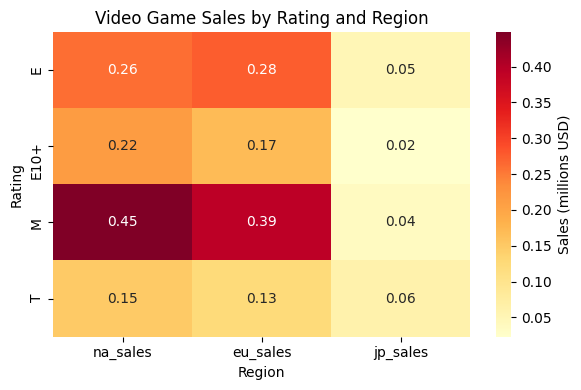

In [ ]:
rating_performance = calculate_region_rating_preformance(df_relevant_4)
print(rating_performance.head())
rating_performance = rating_performance.set_index('rating')
plt.figure(figsize=(6, 4))
sns.heatmap(rating_performance, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Sales (millions USD)'})
plt.title('Video Game Sales by Rating and Region')
plt.xlabel('Region')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


the  data on video game sales by genre and region reflect the market share data. the data on regions reflects that there is popularity with raited m game and e games, this could be because of the popularity of shooting and sport games. there are many games without rating and the video game sales by rating and region totals can reflecet that.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [45]:
games_with_scores = df_relevant_4.dropna(subset = ['user_score'])
xbox_scores = games_with_scores[games_with_scores['platform'] == 'XOne']['user_score']
pc_scores = games_with_scores[games_with_scores['platform'] == 'PC']['user_score']

alpha = 0.01
statistic, p_value = stats.ttest_ind(xbox_scores, pc_scores)
print(f"Alpha level: {alpha}")
print(f"P-value: {p_value}")
print(f"Statistic: {statistic}")

if p_value < alpha:
    print("Reject null hypothesis, user scores are different")
else:
    print("Fail to reject null hypothesis, no significant difference")

action_scores = games_with_scores[games_with_scores['genre'] == 'Action']['user_score']
sports_scores = games_with_scores[games_with_scores['genre'] == 'Sports']['user_score']


alpha = 0.01
statistic, p_value = stats.ttest_ind(action_scores, sports_scores)
print(f"Alpha level: {alpha}")
print(f"P-value: {p_value}")
print(f"Statistic: {statistic}")

if p_value < alpha:
    print("Reject null hypothesis, user scores are different")
else:
    print("Fail to reject null hypothesis, no significant difference")


Alpha level: 0.01
P-value: 0.14012658403611647
Statistic: 1.4788255981357277
Fail to reject null hypothesis, no significant difference
Alpha level: 0.01
P-value: 1.0517832389140023e-27
Statistic: 11.535100577928208
Reject null hypothesis, user scores are different


i formulated the hypothesis to state they are the different. i dropped missing values on the user score so that the test wouldnt fail. i also checked to make sure i had sufficient games. i didnt want to fill in values and risk the validity of my data. i chose my alpha value at .01 to have a precise result. based on the results we see that xbox and pc user scores have  no significant difference what a t statistic of 1.48 meaning xbox user scores on average are slightly larger. meanwhile the data suggest that action user score and sport user scores are differnt as the p value is extremely accurate as its below the alpha value at .01. the t statistic value is at about 11.54 which suggest a significant difference in averages, with action having a larger average.

# Step 6. Write a general conclusion


based on the data, my reccemendation would be to focus on a rated M shooting game on both the Xbox One and Playstation 4 in North America and Europe. the data over the last 4 years (2013-2016)shows that the PS4 and Xbox One bring in the most sales of any platform. to be more specific shooting games, they hold only 8% of total game releases yet make up over 20% of the market share. This shows that even with fewer releases they bring in plenty of sales. we can also see that games with a ESRB rating of M bring in the most sales. shooting games tend to be that M rating which if the trend continues will make another shooting game bring in plenty of sales. lastly another focus should be on the crtic scores, as the data suggest a moderate correlation in sales, meaning that the better the critic score the better the sales tend to be. in conclusion, in recent years the data suggest a focusing rated M shooting game on the PS4 and Xbox One would bring plenty of sales in Europe and North America.